In [419]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

import numpy as np
import random

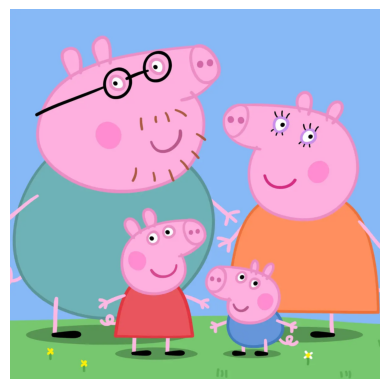

In [420]:
# Загрузка изображения
src = cv2.imread('peppa_pig_2.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

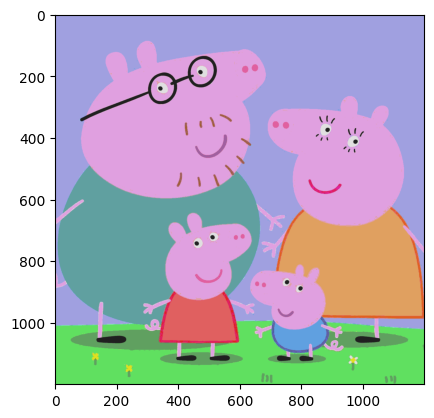

In [421]:
div = 64
quantized = img // div * div + div // 2
plt.imshow(quantized)

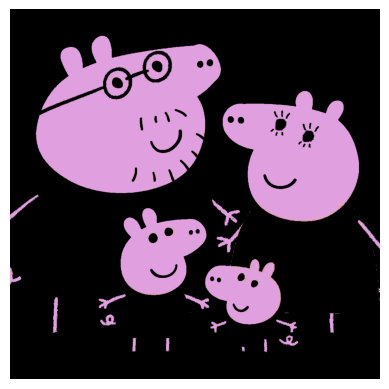

In [422]:
# Выделяем синие объекты на изображении
lower = np.array([200, 100, 100])
higher = np.array([250, 200, 240])
mask = cv2.inRange(quantized, lower, higher)
selection = cv2.bitwise_and(quantized, quantized, mask=mask)
plt.axis('off')
plt.imshow(selection)

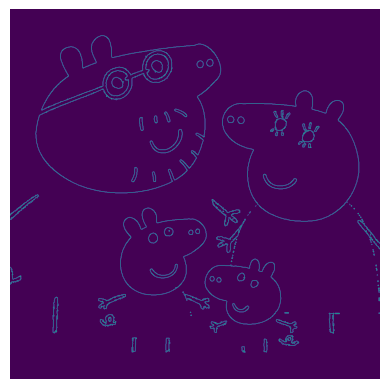

In [423]:
# Преобразуем в ЧБ
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray, cmap='gray')
# plt.show()
# Определение границ оператором Кэнни
canny = cv2.Canny(gray, 200, 210, L2gradient = True)
plt.axis('off')
plt.imshow(canny)

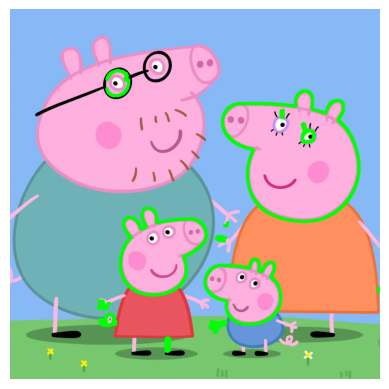

In [428]:
contours = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

for cont in contours:
    #поиск периметра и определение количества углов
    sm = cv2.arcLength(cont, True)
    apd = cv2.approxPolyDP(cont, 0.01*sm, True)
    if 19 <= len(apd) <= 19:
        cv2.drawContours(img, [cont], -1, (0,255,0), 10)
plt.axis('off')
plt.imshow(img)